# The Books of SciFi (Data Science Fiction) 


## Project Overview  
The main goal of this project was to practice **data capture, processing, and analysis** using publicly available online resources.  
For the data source, I selected [**OpenLibrary.org**](https://openlibrary.org/), a large open-access digital library that provides information about millions of books, authors, and subjects. While the site offers an API, I deliberately chose to collect information through **HTML parsing** to gain hands-on experience with web scraping techniques.  

To keep the scope manageable, I focused on a single book subject: **"Science Fiction"**.  

### Project Steps  

1. **Data Gathering**  
   - Accessed the OpenLibrary website using the **HTTP protocol**.  
   - Instead of using the official API, I captured data directly from **HTML pages** for the chosen subject.

2. **Data Parsing**  
   - Used the **Beautiful Soup** library to parse the HTML structure.  
   - Applied **regular expressions** where needed to refine text extraction.

3. **Data Storage**  
   - Structured and stored the scraped information in a **CSV file** for easy reusability and sharing.

4. **Data Analysis**  
   - Loaded the CSV file into a **Jupyter Notebook**.  
   - Performed exploratory analysis using **pandas** (data manipulation) and **matplotlib** (visualization).  
   - Generated plots.

### Tools and Libraries Used  
- **Python**  
- **Beautiful Soup** (HTML parsing)  
- **Regular Expressions** (text extraction)  
- **pandas** (data analysis)  
- **matplotlib** (visualization)  
- **Jupyter Notebook** (interactive analysis and documentation)


## About **OpenLibrary.org**


**OpenLibrary.org** is a free, online digital library that aims to provide a web page for every book ever published.  
It contains millions of records on books, authors, and subjects, and allows users to **read**, **borrow**, and **contribute** book information.


### Search Capacity on OpenLibrary.org (HTML-based)

The site offers a **search function directly over the URL**, which returns a list of books with their **basic details** (such as title, author, and publication year).  
This feature makes it possible to scrape results without using the API, simply by loading and parsing the HTML pages.


## Data capture and parsing ##

### Data Capture Workflow

For this project, I used the *search results* on OpenLibrary as the entry point for data collection:

1. **Initial Book List**  
  - Queried the site via the **search URL** for the chosen subject (**Science Fiction**).  
  - Extracted book records with their **basic metadata**.  
  - Stored this dataset in an intermediary CSV file:  
    **`books_science_fiction_search.csv`**

2. **Detailed Book Data**  
  - For each book in the initial list, I followed the links to the **individual book detail pages**.  
  - Parsed and collected additional information (e.g., subjects, edition count, publication details, etc.).  
  - Saved this enriched dataset into a second file:  
    **`books_science_fiction_detailed.csv`**

This **two-step process** allowed me to build a structured dataset starting from *search results pages* and progressively enriching it with *book-level details*.

> **Note:**  
> In `main.py`, I only capture a **slice of the data** and store it in temporary files (`*_temp.csv`) to demonstrate that the scraping pipeline works correctly.  
> 
> Collecting the **entire dataset** from OpenLibrary.org can be time-consuming and may put unnecessary load on their servers.  
> For this reason, I implemented a **one-shot prefetch** approach:  
> - Download a **full list of Science Fiction books** in advance.  
> - Apply a filter to include only those works with **more than five editions**.  
> 
> This strategy ensures that I can work with a sufficiently rich dataset while keeping the scraping process **efficient** and **respectful** to the OpenLibrary infrastructure.


### Implementation Details

All procedures are implemented in the **`main.py`** module:

- **`crawl_openlibrary_books_by_subject`**  
  - Queries the site using the subject search URL.  
  - Parses the HTML and extracts book records.  
  - Stores the results in **`books_science_fiction_search.csv`**.  
  - Attributes captured:  
    - `title`, `work_key`, `book_url`

- **`crawl_book_details_from_csv`**  
  - Reads each row from **`books_science_fiction_search.csv`**.  
  - Visits the corresponding book detail page.  
  - Extracts and maps additional metadata.  
  - Stores the enriched dataset in **`books_science_fiction_detailed.csv`**.  
  - Attributes captured:  
    - `source_url`, `title`, `authors`, `first_published`, `publish_date`,  
      `subjects`, `language`, `isbn`, `edition_count`,  
      `rating`, `number_of_ratings`, `pages`, `original_title`, `work_key`


## Data Analysis

Loading data:

In [1]:
import pandas as pd
import os
from ast import literal_eval

# print(os.getcwd())
books_sc = pd.read_csv("./data/books_science_fiction_detailed.csv", index_col="work_key")

In [2]:
print('There is :' , len(books_sc), 'books in the dataset.')

There is : 2653 books in the dataset.


In [3]:
print('First 10 books:')
books_sc.head(10)

First 10 books:


,source_url,title,authors,first_published,publish_date,subjects,language,isbn,edition_count,rating,number_of_ratings,pages,original_title
work_key,,,,,,,,,,,,,
OL10215W,https://openlibrary.org/works/OL10215W/Мы?edit...,We,"['Евгений Иванович Замятин', 'Gary Kern', 'Ale...",1924.0,2020,"['Literature: Texts', 'Untranslated Fiction - ...",English,9780140185850,210,4.0,39,221,We
OL74502W,https://openlibrary.org/works/OL74502W/The_Iro...,The Iron Heel,['Jack London'],1907.0,2010-07-16,"['Revolutions, fiction', 'Oligarchy, fiction',...",English,NaN,594,3.5,20,0,The Iron Heel
OL1099513W,https://openlibrary.org/works/OL1099513W/Voyag...,Journey to the Center of the Earth,['Jules Verne'],1867.0,2020,"['Fiction', 'Science fiction', 'Imaginary Voya...",English,NaN,204,4.0,73,0,Journey to the Center of the Earth
OL52195W,https://openlibrary.org/works/OL52195W/The_foo...,The Food of the Gods,['H. G. Wells'],1900.0,2024,"['Fiction', 'Giants', 'Growth factors', 'Food ...",English,NaN,194,3.2,9,0,The Food of the Gods
OL45793W,https://openlibrary.org/works/OL45793W/Charlie...,Charlie and the Great Glass Elevator,['Roald Dahl'],1972.0,1972,"['Charlie Bucket (Fictitious character)', 'Juv...",English,0394824725,108,3.5,50,0,Charlie and the Great Glass Elevator
OL2163649W,https://openlibrary.org/works/OL2163649W/The_H...,The Hitch Hiker's Guide to the Galaxy,['Douglas Adams'],1979.0,1980,"['comic science fiction', 'Vogons', 'Humorous ...",English,NaN,120,4.6,155,159,The Hitch Hiker's Guide to the Galaxy
OL18417W,https://openlibrary.org/works/OL18417W/The_Won...,The new Wizard of Oz,['L. Frank Baum'],1899.0,1944,"['Witches', 'Toy and movable books', 'Spanish ...",English,NaN,2052,4.0,113,209,The new Wizard of Oz
OL103123W,https://openlibrary.org/works/OL103123W/Fahren...,Fahrenheit 451,['Ray Bradbury'],1953.0,1971-11,"['Mechanical Hound', 'girl next door', 'Long N...",English,NaN,257,4.0,406,147,Fahrenheit 451
OL49488W,https://openlibrary.org/works/OL49488W/Ender's...,Ender's Game,['Orson Scott Card'],1985.0,2002,"['New York Times bestseller', 'nyt:mass_market...",English,1448767911,104,4.4,388,330,Ender's Game


In [4]:
print('Last 10 books:')
books_sc.tail(10)

Last 10 books:


,source_url,title,authors,first_published,publish_date,subjects,language,isbn,edition_count,rating,number_of_ratings,pages,original_title
work_key,,,,,,,,,,,,,
OL15425491W,https://openlibrary.org/works/OL15425491W/The_...,The Time Bender,['Keith Laumer'],1966.0,1981,"['Science fiction', 'Fiction, science fiction,...",English,0441810128,6,0.0,0,248,The Time Bender
OL515681W,https://openlibrary.org/works/OL515681W/The_ea...,The early H.G. Wells.,"['Bergonzi, Bernard.']",1961.0,1961,"['Criticism and interpretation', 'English Scie...",English,NaN,6,0.0,0,226,The early H.G. Wells.
OL120366W,https://openlibrary.org/works/OL120366W/C.L.U....,C.L.U.T.Z.,['Marilyn Z. Wilkes'],1982.0,1982,"['Fiction', 'Robots', 'Science fiction', 'Juve...",English,"0803711573, \n 0803711581",6,0.0,0,120,C.L.U.T.Z.
OL16482311W,https://openlibrary.org/works/OL16482311W/The_...,The Worlds of Science Fiction,"['Robert P Mills editor', 'Robert P. Mills', '...",1963.0,1970-07,['Science fiction'],English,NaN,6,0.0,0,287,The Worlds of Science Fiction
OL6280945W,https://openlibrary.org/works/OL6280945W/Seed_...,Seed of Light,['Edmund Cooper'],1959.0,1959,"['Science fiction', 'british science fiction',...",English,NaN,6,2.0,1,223,Seed of Light
OL21603709W,https://openlibrary.org/works/OL21603709W/Dis-...,Dis-Orienting Planets,['Isiah Lavender'],2017.0,2021,"['Science fiction, history and criticism', 'Ra...",English,9781496837943,6,0.0,0,0,Dis-Orienting Planets: Racial Representations ...
OL17397W,https://openlibrary.org/works/OL17397W/The_Vie...,The View from Serendip,['Arthur C. Clarke'],1977.0,1978,"['Authors, English', 'Authorship', 'Biography'...",English,0575023031,6,0.0,0,273,The View from Serendip
OL29275522W,https://openlibrary.org/works/OL29275522W/The_...,The best from Fantasy and science fiction,['Avram Davidson'],1963.0,1965,"['Science fiction', 'Collections', 'Revelation...",English,NaN,6,0.0,0,251,The best from Fantasy and science fiction
OL15845658W,https://openlibrary.org/works/OL15845658W/Twin...,"Twinkle, Twinkle Little Star",['Ben Barzman'],1960.0,1960-01-01,"['Science fiction', 'Extraterrestrial beings',...",English,NaN,6,0.0,0,274,"Twinkle, Twinkle Little Star"


In [5]:
# Display the authors of the books
# It is a string representation of the list.
books_sc["authors"]

work_key
OL10215W       ['Евгений Иванович Замятин', 'Gary Kern', 'Ale...
OL74502W                                         ['Jack London']
OL1099513W                                       ['Jules Verne']
OL52195W                                         ['H. G. Wells']
OL45793W                                          ['Roald Dahl']
                                     ...                        
OL21603709W                                   ['Isiah Lavender']
OL17397W                                    ['Arthur C. Clarke']
OL29275522W                                   ['Avram Davidson']
OL15845658W                                      ['Ben Barzman']
OL6021642W                                     ['Peter Morwood']
Name: authors, Length: 2653, dtype: object

In [6]:
# Convert the 'authors' column from string representation of list to actual list
books_sc['authors_list'] = books_sc['authors'].apply(literal_eval)

In [7]:
# Add a new column with the number of authors for each book
books_sc['authors_list_len'] = books_sc['authors_list'].apply(len)
books_sc.head(3)

,source_url,title,authors,first_published,publish_date,subjects,language,isbn,edition_count,rating,number_of_ratings,pages,original_title,authors_list,authors_list_len
work_key,,,,,,,,,,,,,,,
OL10215W,https://openlibrary.org/works/OL10215W/Мы?edit...,We,"['Евгений Иванович Замятин', 'Gary Kern', 'Ale...",1924.0,2020,"['Literature: Texts', 'Untranslated Fiction - ...",English,9780140185850,210,4.0,39,221,We,"[Евгений Иванович Замятин, Gary Kern, Alejandr...",7
OL74502W,https://openlibrary.org/works/OL74502W/The_Iro...,The Iron Heel,['Jack London'],1907.0,2010-07-16,"['Revolutions, fiction', 'Oligarchy, fiction',...",English,NaN,594,3.5,20,0,The Iron Heel,[Jack London],1
OL1099513W,https://openlibrary.org/works/OL1099513W/Voyag...,Journey to the Center of the Earth,['Jules Verne'],1867.0,2020,"['Fiction', 'Science fiction', 'Imaginary Voya...",English,NaN,204,4.0,73,0,Journey to the Center of the Earth,[Jules Verne],1


In [8]:
# Filter books with more than five authors
books_sc[books_sc["authors_list_len"] > 5].head(3)

,source_url,title,authors,first_published,publish_date,subjects,language,isbn,edition_count,rating,number_of_ratings,pages,original_title,authors_list,authors_list_len
work_key,,,,,,,,,,,,,,,
OL10215W,https://openlibrary.org/works/OL10215W/Мы?edit...,We,"['Евгений Иванович Замятин', 'Gary Kern', 'Ale...",1924.0,2020,"['Literature: Texts', 'Untranslated Fiction - ...",English,9780140185850,210,4.0,39,221,We,"[Евгений Иванович Замятин, Gary Kern, Alejandr...",7
OL381550W,https://openlibrary.org/works/OL381550W/The_Is...,The Island of Doctor Moreau,"['H. G. Wells', 'Fiona Beddall', 'Dobbs', 'Fab...",1896.0,2022-02-15,"['Islands', 'Survival after airplane accidents...",English,NaN,295,3.7,46,0,The Island of Doctor Moreau,"[H. G. Wells, Fiona Beddall, Dobbs, Fabrizio F...",12
OL47752W,https://openlibrary.org/works/OL47752W/The_woo...,The Wood Beyond the World,"['William Morris', 'William Norris', 'William,...",1894.0,2017,"['Classic Literature', 'Fantasy', 'Fiction', '...",English,NaN,192,3.6,5,0,The Wood Beyond the World,"[William Morris, William Norris, William, Morr...",7


In [9]:
# Find the book(s) with the maximum number of authors
max_authors_len = books_sc['authors_list_len'].max()
print(max_authors_len)
books_sc[books_sc['authors_list_len'] == max_authors_len]

69


,source_url,title,authors,first_published,publish_date,subjects,language,isbn,edition_count,rating,number_of_ratings,pages,original_title,authors_list,authors_list_len
work_key,,,,,,,,,,,,,,,
OL14958898W,https://openlibrary.org/works/OL14958898W/100_...,100 Great Science Fiction Short Short Stories,"['Isaac Asimov', 'Martin H. Greenberg', 'Josep...",1978.0,1980-08,"['American Science fiction', 'English Science ...",English,0380507730,7,4.0,1,0,100 Great Science Fiction Short Short Stories,"[Isaac Asimov, Martin H. Greenberg, Joseph D. ...",69


In [10]:
# Sort the books by their first published date
# we should take this result with the grain of salt :)
books_sc_sorted = books_sc.sort_values(by="first_published")
books_sc_sorted.head(3)

,source_url,title,authors,first_published,publish_date,subjects,language,isbn,edition_count,rating,number_of_ratings,pages,original_title,authors_list,authors_list_len
work_key,,,,,,,,,,,,,,,
OL579075W,https://openlibrary.org/works/OL579075W/Junkya...,The Cosmic Computer,['H. Beam Piper'],1631.0,2017,"['Fiction', 'Science Fiction', 'Fiction, scien...",English,NaN,57,2.0,1,0,The Cosmic Computer,[H. Beam Piper],1
OL16800177W,https://openlibrary.org/works/OL16800177W/Chi_...,¿quién ha robado la Mona Lisa?,['Elisabetta Dami'],1655.0,2010,"['Geronimo Stilton (Fictitious character)', 'A...",NaN,9788408096078,8,5.0,1,0,¿quién ha robado la Mona Lisa?,[Elisabetta Dami],1
OL59691W,https://openlibrary.org/works/OL59691W/Sixth_C...,Sixth Column,['Robert A. Heinlein'],1657.0,1999,"['Fiction, general', 'Fiction, science fiction...",English,067157826X,38,3.0,8,256,Sixth Column,[Robert A. Heinlein],1


In [11]:
# Sort the books by their edition count
books_sc_sorted_by_edition = books_sc.sort_values(by="edition_count")
# Get the top 3 books with the most editions
books_sc_sorted_by_edition.tail(3)

,source_url,title,authors,first_published,publish_date,subjects,language,isbn,edition_count,rating,number_of_ratings,pages,original_title,authors_list,authors_list_len
work_key,,,,,,,,,,,,,,,
OL18417W,https://openlibrary.org/works/OL18417W/The_Won...,The new Wizard of Oz,['L. Frank Baum'],1899.0,1944,"['Witches', 'Toy and movable books', 'Spanish ...",English,NaN,2052,4.0,113,209,The new Wizard of Oz,[L. Frank Baum],1
OL450063W,https://openlibrary.org/works/OL450063W/Franke...,Frankenstein,['Mary Shelley'],1818.0,2022-02-15,"['Frankenstein (Fictitious character)', ""Frank...",English,NaN,2184,4.0,200,0,Frankenstein,[Mary Shelley],1
OL138052W,https://openlibrary.org/works/OL138052W/Alice'...,Alice's Adventures in Wonderland,['Lewis Carroll'],1865.0,1928,"['Alice (fictitious character : carroll), fict...",English,NaN,3546,4.0,196,198,Alice's Adventures in Wonderland,[Lewis Carroll],1


### Authors with maximum number of books published

In [12]:
# authors with maximum book published
from collections import Counter

# Flatten the list of all authors
all_authors = [author for authors in books_sc['authors_list'] for author in authors]
# from a flattened list of authors, count the occurrences of each author
author_counts = Counter(all_authors)

count = max(author_counts.values())

most_common_authors = [author for author, cnt in author_counts.items() if cnt == count]
print(f"Authors appearing in {count} books: {most_common_authors}")

Authors appearing in 73 books: ['Katherine Applegate']


### Subjects

In [13]:
# Flatten the list of all subjects
all_subjects = [subject for subjects in books_sc['subjects'] for subject in literal_eval(subjects)]
subject_counts = Counter(all_subjects)

max_subject_count = max(subject_counts.values())

most_common_subjects = [subject for subject, cnt in subject_counts.items() if cnt == max_subject_count]
print(f"Subjects appearing in {max_subject_count} books: {most_common_subjects}")

Subjects appearing in 1945 books: ['Science fiction']


In [14]:
subjects_at_least_5 = [subject for subject, count in subject_counts.items() if count >= 5]
print(f"Count of subjects appearing in at least 5 books: {len(subjects_at_least_5)}")

Count of subjects appearing in at least 5 books: 881


### Number of books published by decades

<Axes: title={'center': 'Number of Books Published per Decade'}, xlabel='first_published'>

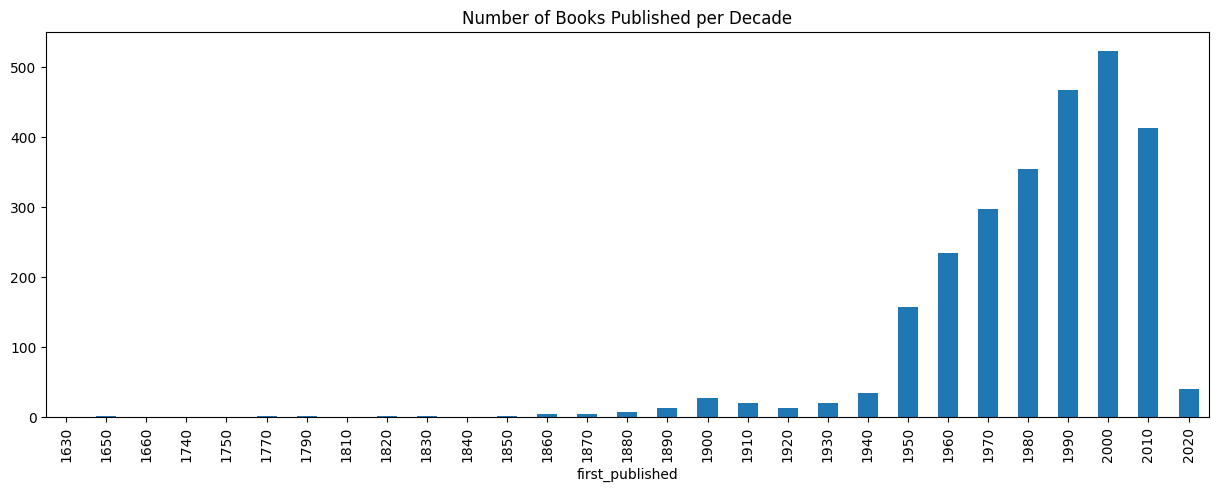

In [16]:
# Create Barchart: Number of Books Published per Decade
books_by_decade = books_sc['first_published'].dropna().astype(int).apply(lambda x: (x // 10) * 10)

decades_range = range(int(books_sc['first_published'].min() // 10 * 10), int(books_sc['first_published'].max() // 10 * 10) + 10, 10)
# Ensure all decades are present in the counts, filling missing with 0
books_by_decade_counts = books_by_decade.value_counts().sort_index()
books_by_decade_counts.plot(kind='bar', figsize=(15, 5), title='Number of Books Published per Decade')